### Encuesta permanente de hogares (Indec)
#### Módulo de  Acceso a Tecnologías
##### Objetivo: Breve análisis sobre el acceso a tecnología e internet en los hogares del territorio argentino

In [1]:
import pandas as pd

datah = pd.read_table("EPH_usu_hog_tic_t421.txt", sep=";")

datah

,CODUSU,NRO_HOGAR,REALIZADA,ANO4,TRIMESTRE,AGLOMERADO,POND_TIC,IH_II_01,IH_II_02
0,TQRMNOPPVHMMLLCDEFIAH00709535,1,1,2021,4,2,629,1,1
1,TQRMNOPPWHLKKSCDEFIAH00714594,1,1,2021,4,2,1098,1,1
2,TQRMNOPPWHLNKNCDEFIAH00714513,1,1,2021,4,2,987,1,1
3,TQRMNOPPWHMMKOCDEFIAH00710151,1,1,2021,4,2,617,1,1
4,TQRMNOPPYHLNKNCDEFIAH00714543,1,1,2021,4,2,893,2,1
...,...,...,...,...,...,...,...,...,...
17005,TQRMNOTRXHJOKMCDEOJAH00697801,1,1,2021,4,93,72,1,1
17006,TQRMNOTRYHJOKMCDEOJAH00697802,1,1,2021,4,93,72,2,2
17007,TQRMNOTSQHJOKMCDEOJAH00697805,1,1,2021,4,93,72,2,2
17008,TQSMNOPWVHMKKUCDEOJAH00720340,1,1,2021,4,93,71,1,1


In [2]:
datah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CODUSU      17010 non-null  object
 1   NRO_HOGAR   17010 non-null  int64 
 2   REALIZADA   17010 non-null  int64 
 3   ANO4        17010 non-null  int64 
 4   TRIMESTRE   17010 non-null  int64 
 5   AGLOMERADO  17010 non-null  int64 
 6   POND_TIC    17010 non-null  int64 
 7   IH_II_01    17010 non-null  int64 
 8   IH_II_02    17010 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 1.2+ MB


In [3]:
datah[datah["REALIZADA"]==2]    #Todas las encuestas en el registro están realizadas

,CODUSU,NRO_HOGAR,REALIZADA,ANO4,TRIMESTRE,AGLOMERADO,POND_TIC,IH_II_01,IH_II_02


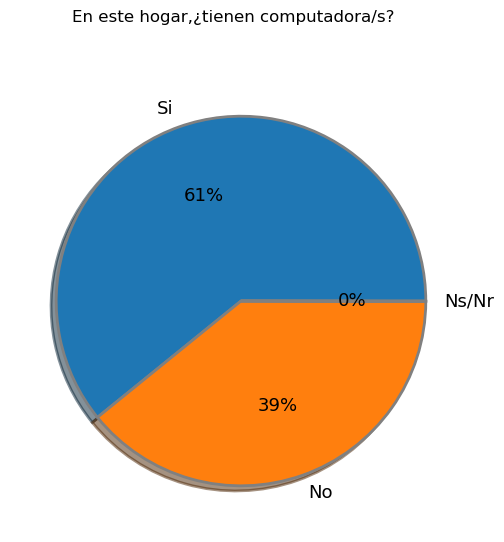

In [4]:
tienepc = datah.groupby(datah.IH_II_01).count()

import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(6,6))
fig1.suptitle("En este hogar,¿tienen computadora/s?")
ax1.pie(tienepc.CODUSU, shadow=True, autopct="%1.0f%%", labels=["Si","No","Ns/Nr"], wedgeprops={"linewidth":2, "edgecolor":"gray"},
        textprops={"fontsize":13})

plt.show()

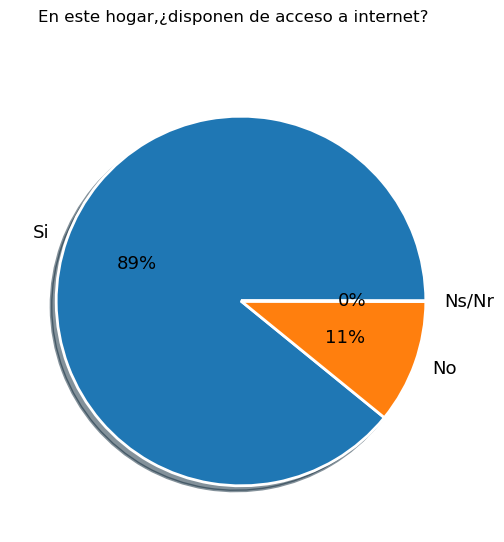

In [5]:
internet = datah.groupby(datah.IH_II_02).count()

fig2, ax2 = plt.subplots(figsize=(6,6))
fig2.suptitle("En este hogar,¿disponen de acceso a internet?")
ax2.pie(internet.CODUSU, shadow=True, autopct="%1.0f%%", labels=["Si","No","Ns/Nr"], wedgeprops={"linewidth":2, "edgecolor":"white"},
        textprops={"fontsize":13})

plt.show()

In [6]:
#Se modifican dos códigos por comidad en las gráficas
def mapeo(num):
    if num==91:
        num=39   #Paso  Rawson-Trelew a código 39
    if num==93:
        num=40  #Viedma-Carmen de Patagones a código 40
    else:
        pass             
    return num
datah['AGLOMERADO'].apply(mapeo)

0         2
1         2
2         2
3         2
4         2
         ..
17005    40
17006    40
17007    40
17008    40
17009    40
Name: AGLOMERADO, Length: 17010, dtype: int64

In [7]:
datah['AGLOMERADO']=datah['AGLOMERADO'].apply(mapeo)
datah

,CODUSU,NRO_HOGAR,REALIZADA,ANO4,TRIMESTRE,AGLOMERADO,POND_TIC,IH_II_01,IH_II_02
0,TQRMNOPPVHMMLLCDEFIAH00709535,1,1,2021,4,2,629,1,1
1,TQRMNOPPWHLKKSCDEFIAH00714594,1,1,2021,4,2,1098,1,1
2,TQRMNOPPWHLNKNCDEFIAH00714513,1,1,2021,4,2,987,1,1
3,TQRMNOPPWHMMKOCDEFIAH00710151,1,1,2021,4,2,617,1,1
4,TQRMNOPPYHLNKNCDEFIAH00714543,1,1,2021,4,2,893,2,1
...,...,...,...,...,...,...,...,...,...
17005,TQRMNOTRXHJOKMCDEOJAH00697801,1,1,2021,4,40,72,1,1
17006,TQRMNOTRYHJOKMCDEOJAH00697802,1,1,2021,4,40,72,2,2
17007,TQRMNOTSQHJOKMCDEOJAH00697805,1,1,2021,4,40,72,2,2
17008,TQSMNOPWVHMKKUCDEOJAH00720340,1,1,2021,4,40,71,1,1


In [8]:
pc_aglomerado = datah.groupby(["AGLOMERADO","IH_II_01"]).count()
pc_aglomerado

CODUSU  NRO_HOGAR  REALIZADA  ANO4  TRIMESTRE  POND_TIC  \
AGLOMERADO IH_II_01                                                            
2          1            313        313        313   313        313       313   
           2            106        106        106   106        106       106   
           9              1          1          1     1          1         1   
3          1            277        277        277   277        277       277   
           2            136        136        136   136        136       136   
...                     ...        ...        ...   ...        ...       ...   
38         2            278        278        278   278        278       278   
39         1            343        343        343   343        343       343   
           2            153        153        153   153        153       153   
40         1            277        277        277   277        277       277   
           2            136        136        136   136        136       136   

                     IH_II_02  
AGLOMERADO IH_II_01            
2          1              313  
           2              106  
           9                1  
3          1              277  
           2              136  
...                       ...  
38         2              278  
39         1              343  
           2              153  
40         1              277  
           2              136  

[71 rows x 7 columns]

In [9]:
pc_aglomerado = pc_aglomerado.reset_index()
pc_aglomerado

,AGLOMERADO,IH_II_01,CODUSU,NRO_HOGAR,REALIZADA,ANO4,TRIMESTRE,POND_TIC,IH_II_02
0,2,1,313,313,313,313,313,313,313
1,2,2,106,106,106,106,106,106,106
2,2,9,1,1,1,1,1,1,1
3,3,1,277,277,277,277,277,277,277
4,3,2,136,136,136,136,136,136,136
...,...,...,...,...,...,...,...,...,...
66,38,2,278,278,278,278,278,278,278
67,39,1,343,343,343,343,343,343,343
68,39,2,153,153,153,153,153,153,153
69,40,1,277,277,277,277,277,277,277


In [10]:
pc_aglomerado.set_index("AGLOMERADO", inplace=True)

In [11]:
pc_aglomerado.index

Int64Index([ 2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,  8,  8,  9,
             9, 10, 10, 12, 12, 13, 13, 14, 14, 15, 15, 17, 17, 17, 18, 18, 19,
            19, 20, 20, 22, 22, 23, 23, 25, 25, 26, 26, 26, 27, 27, 29, 29, 30,
            30, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 36, 36, 38, 38, 39,
            39, 40, 40],
           dtype='int64', name='AGLOMERADO')

In [12]:
pc_aglomerado.CODUSU.loc[pc_aglomerado.IH_II_01 ==1]

AGLOMERADO
2     313
3     277
4     376
5     300
6     401
7     256
8     223
9     235
10    428
12    213
13    424
14    260
15    192
17    270
18    251
19    324
20    232
22    229
23    401
25    288
26    334
27    262
29    298
30    214
31    322
32    618
33    998
34    236
36    298
38    256
39    343
40    277
Name: CODUSU, dtype: int64

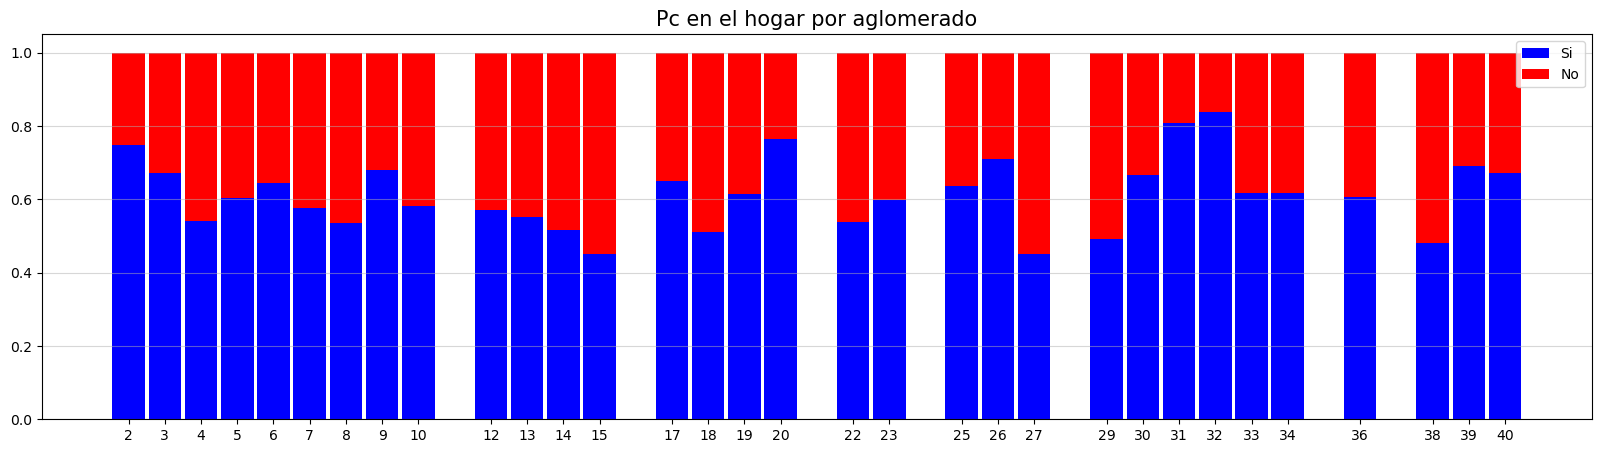

In [13]:
b = pc_aglomerado.CODUSU.loc[pc_aglomerado.IH_II_01 ==1]
c = pc_aglomerado.CODUSU.loc[pc_aglomerado.IH_II_01 ==2]
totales = b+c

e = b/totales
f = c/totales


fig3, ax3 = plt.subplots(figsize=(20,5))
ax3.bar(b.index,e, width=0.9, color="blue", tick_label=b.index, label="Si")
ax3.bar(b.index,f, bottom=e, width=0.9, color="red", label="No")
ax3.grid(axis='y', alpha=0.5)

plt.title("Pc en el hogar por aglomerado", fontsize=15)

plt.legend()

In [14]:
internet_aglomerado = datah.groupby(["AGLOMERADO","IH_II_02"]).count()
internet_aglomerado

CODUSU  NRO_HOGAR  REALIZADA  ANO4  TRIMESTRE  POND_TIC  \
AGLOMERADO IH_II_02                                                            
2          1            384        384        384   384        384       384   
           2             36         36         36    36         36        36   
3          1            364        364        364   364        364       364   
           2             49         49         49    49         49        49   
4          1            533        533        533   533        533       533   
...                     ...        ...        ...   ...        ...       ...   
38         2            114        114        114   114        114       114   
39         1            453        453        453   453        453       453   
           2             43         43         43    43         43        43   
40         1            372        372        372   372        372       372   
           2             41         41         41    41         41        41   

                     IH_II_01  
AGLOMERADO IH_II_02            
2          1              384  
           2               36  
3          1              364  
           2               49  
4          1              533  
...                       ...  
38         2              114  
39         1              453  
           2               43  
40         1              372  
           2               41  

[67 rows x 7 columns]

In [15]:
internet_aglomerado = internet_aglomerado.reset_index()


In [16]:
internet_aglomerado.set_index("AGLOMERADO", inplace=True)
internet_aglomerado.index

Int64Index([ 2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,  8,  8,  9,  9,
            10, 10, 12, 12, 13, 13, 14, 14, 15, 15, 17, 17, 18, 18, 19, 19, 20,
            20, 22, 22, 23, 23, 25, 25, 26, 26, 27, 27, 29, 29, 30, 30, 31, 31,
            32, 32, 32, 33, 33, 33, 34, 34, 36, 36, 38, 38, 39, 39, 40, 40],
           dtype='int64', name='AGLOMERADO')

In [17]:
internet_aglomerado.CODUSU.loc[internet_aglomerado.IH_II_02 ==1]

AGLOMERADO
2      384
3      364
4      533
5      430
6      544
7      389
8      337
9      336
10     658
12     341
13     678
14     440
15     374
17     351
18     458
19     487
20     296
22     368
23     616
25     435
26     438
27     512
29     549
30     280
31     387
32     697
33    1433
34     348
36     453
38     420
39     453
40     372
Name: CODUSU, dtype: int64

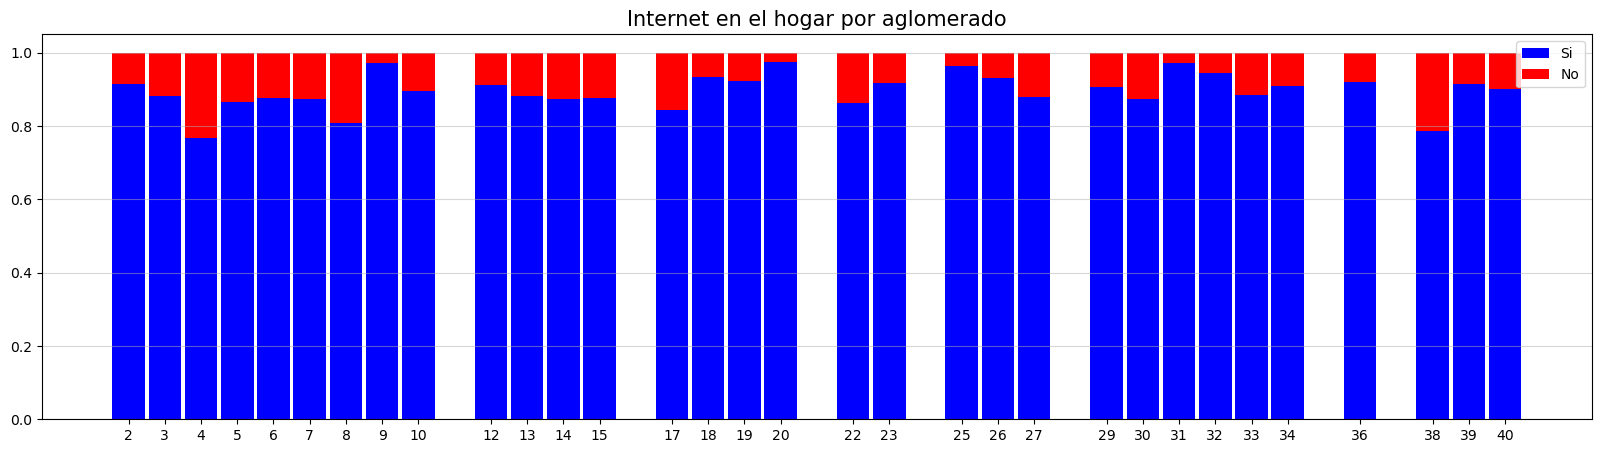

In [18]:
b1 = internet_aglomerado.CODUSU.loc[internet_aglomerado.IH_II_02 ==1]
c1 = internet_aglomerado.CODUSU.loc[internet_aglomerado.IH_II_02 ==2]
totales1 = b1+c1

e1 = b1/totales1
f1 = c1/totales1

fig4, ax4 = plt.subplots(figsize=(20,5))
ax4.bar(b1.index,e1, width=0.9, color="blue", tick_label=b1.index, label="Si")
ax4.bar(b1.index,f1, bottom=e1, width=0.9, color="red", label="No")
ax4.grid(axis='y', alpha=0.5)


plt.title("Internet en el hogar por aglomerado", fontsize=15)
plt.legend()

Código de aglomerado:
##### 02 Gran La Plata
##### 03 Bahía Blanca-Cerri
##### 04 Gran Rosario
##### 05 Gran Santa Fe
##### 06 Gran Paraná
##### 07 Posadas
##### 08 Gran Resistencia
##### 09 Comodoro Rivadavia-Rada Tilly
##### 10 Gran Mendoza
##### 12 Corrientes
##### 13 Gran Córdoba
##### 14 Concordia
##### 15 Formosa
##### 17 Neuquén-Plottier
##### 18 Santiago del Estero-La Banda
##### 19 Jujuy-Palpalá
##### 20 Rio Gallegos
##### 22 Gran Catamarca
##### 23 Gran Salta
##### 25 La Rioja
##### 26 Gran San Luis
##### 27 Gran San Juan
##### 29 Gran Tucumán-Tafi Viejo
##### 30 Santa Rosa-Toay
##### 31 Ushuaia-Rio Grande
##### 32 Ciudad Autónoma de Buenos Aires 
##### 33 Partidos del Gran Buenos Aires
##### 34 Mar del Plata
##### 36 Rio Cuarto
##### 38 San Nicolas-Villa Constitución
##### 91 Rawson-Trelew (modificado a 39)
##### 93 Viedma-Carmen de Patagones (modificado a 40)